In [5]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import glob
import csv
import pandas as pd
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df_precision = pd.read_csv('./data/different_slate_size.csv')

df_precision

,SlateSize,Algorithm,Seed,Precision,Recall
0,3,Random,0,0.007454,0.000312
1,4,Random,0,0.008131,0.000392
2,5,Random,0,0.007412,0.000474
3,6,Random,0,0.007506,0.000546
4,7,Random,0,0.007126,0.000568
...,...,...,...,...,...
91,6,ALS,954358,0.213459,0.028892
92,7,ALS,954358,0.208424,0.033054
93,8,ALS,954358,0.203806,0.036944
94,9,ALS,954358,0.198722,0.040242


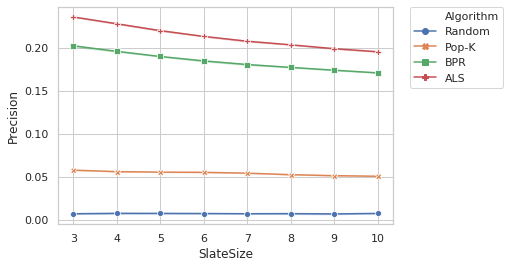

In [6]:
ax = sns.lineplot(x="SlateSize", y="Precision", hue="Algorithm",
                  style="Algorithm", markers=True, dashes=False,
                  data=df_precision)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [3]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fmri = sns.load_dataset("fmri")

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(fmri[fmri["subject"] == "s13"])

     subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
15       s13         17  stim  parietal -0.008265
29       s13         16  stim  parietal -0.002856
43       s13         15  stim  parietal -0.010971
57       s13         14  stim  parietal -0.033713
71       s13         13  stim  parietal -0.068637
85       s13         12  stim  parietal -0.100984
99       s13         11  stim  parietal -0.112575
113      s13         10  stim  parietal -0.074503
127      s13          9  stim  parietal  0.013245
140      s13          8  stim  parietal  0.130991
154      s13          7  stim  parietal  0.240747
168      s13          6  stim  parietal  0.291884
184      s13          5  stim  parietal  0.252627
197      s13          4  stim  parietal  0.136219
212      s13          3  stim  parietal  0.008418
226      s13          2  stim  parietal -0.062916
238      s13          1  stim  parietal -0.064256
252      s13          0  stim  parietal -0.042467


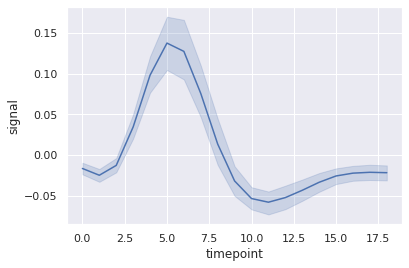

In [6]:
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)